In [1]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline    
import sys, copy
from pathlib import Path
lib_dir = (Path("__file__").parent).resolve()
if str(lib_dir) not in sys.path: sys.path.insert(0, str(lib_dir))
from AdapAug.augmentations import augment_list
from collections import Counter
# from theconf import Config as C, ConfigArgumentParser

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [3]:
exp_name = "c100_v3_M8_evbk_resnet_fullaff"
target = torch.load(f"/home/server36/yongsu/adapaug/AdapAug/models/{exp_name}/target_network.pt")
ctl = torch.load(f"/home/server36/yongsu/adapaug/AdapAug/models/{exp_name}/ctl_network.pt")

print(target.keys())
print(ctl.keys())

print(ctl['div_trace'].keys())
print(ctl['aff_trace'].keys())

dict_keys(['epoch', 'model', 'optimizer_state_dict', 'policy', 'test_metrics'])
dict_keys(['epoch', 'ctl_state_dict', 'optimizer_state_dict', 'aff_trace', 'div_trace', 'train_metrics'])
dict_keys(['cnt', 'time', 'acc', 'pol_loss', 'reward'])
dict_keys(['cnt', 'time', 'acc', 'pol_loss', 'reward'])


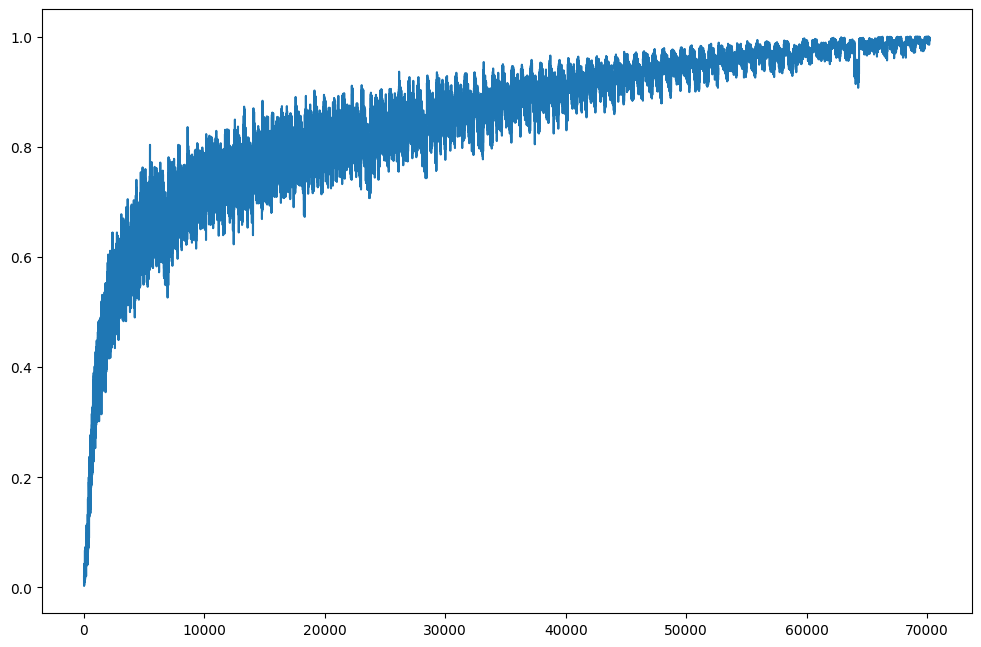

In [4]:
plt.plot(np.array(ctl['div_trace']['acc']) / np.array(ctl['div_trace']['cnt']))

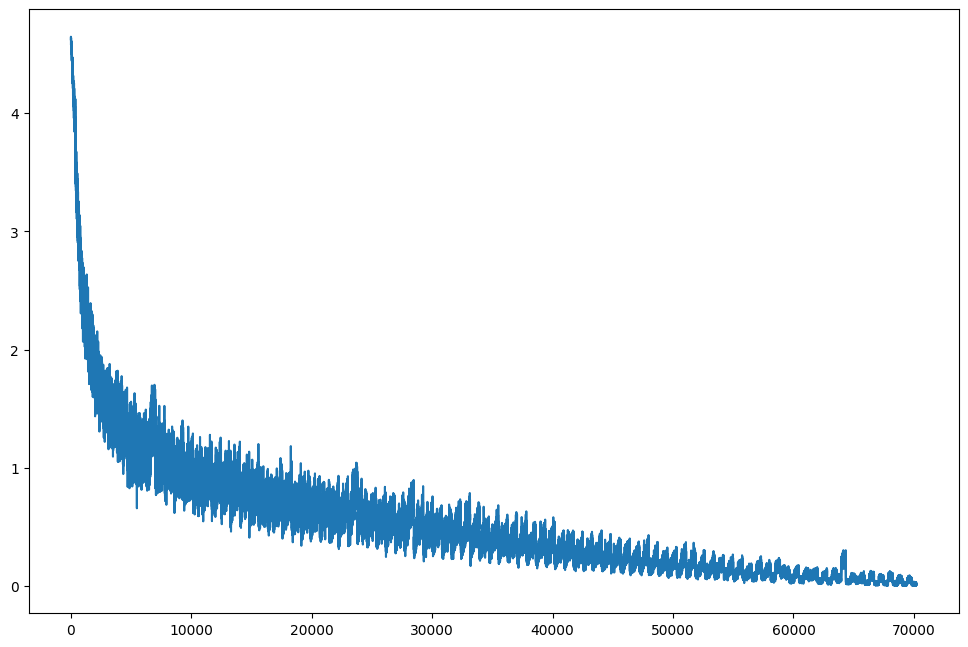

In [5]:
plt.plot(np.array(ctl['div_trace']['reward']) / np.array(ctl['div_trace']['cnt']))

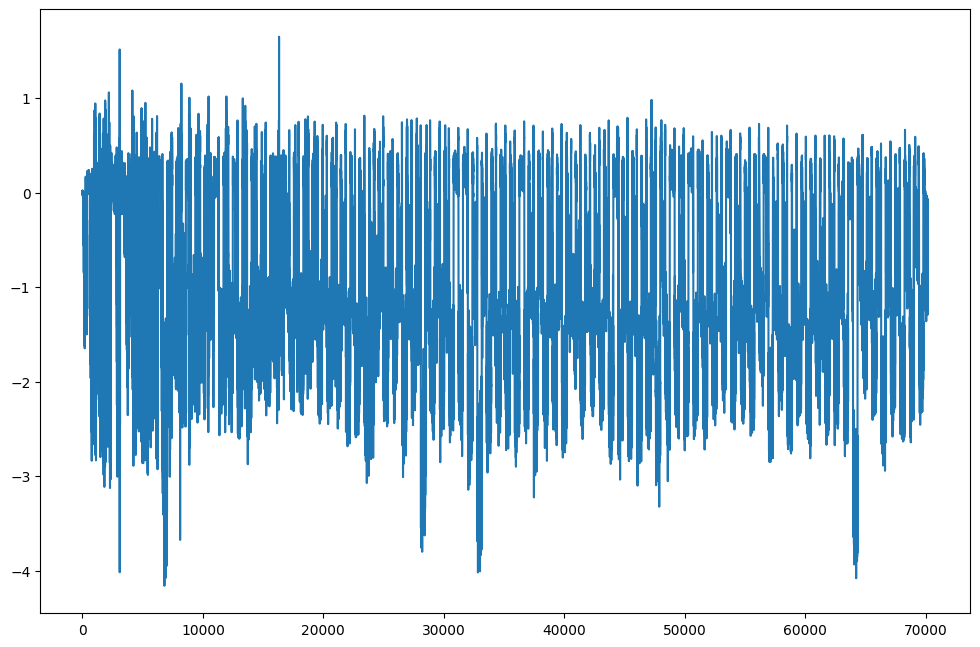

In [6]:
plt.plot(np.array(ctl['div_trace']['pol_loss']) / np.array(ctl['div_trace']['cnt']))

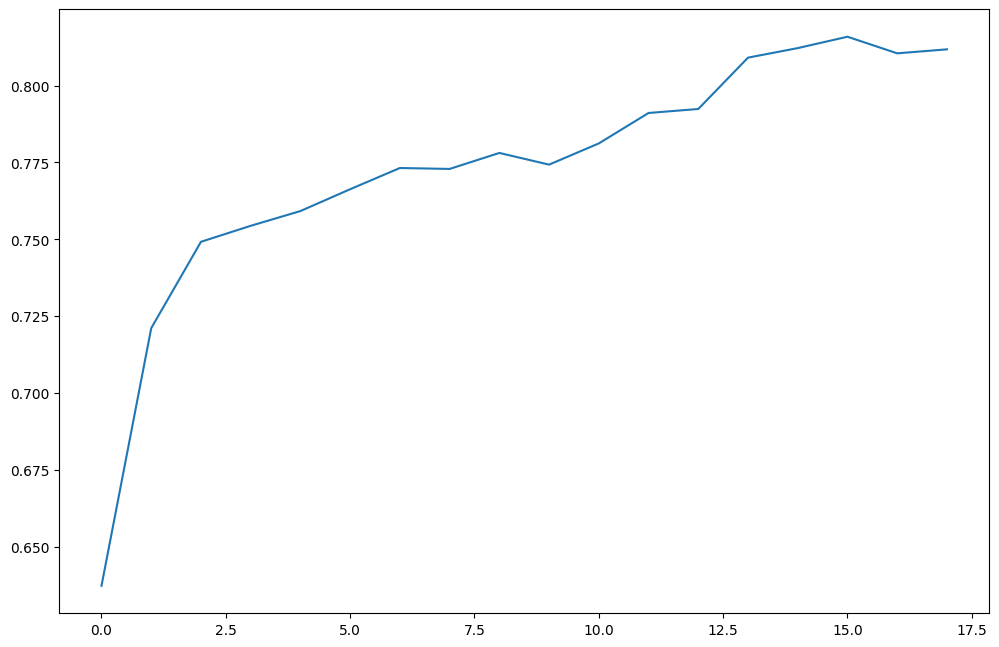

In [7]:
plt.plot([x['top1'] for x in target['test_metrics']])

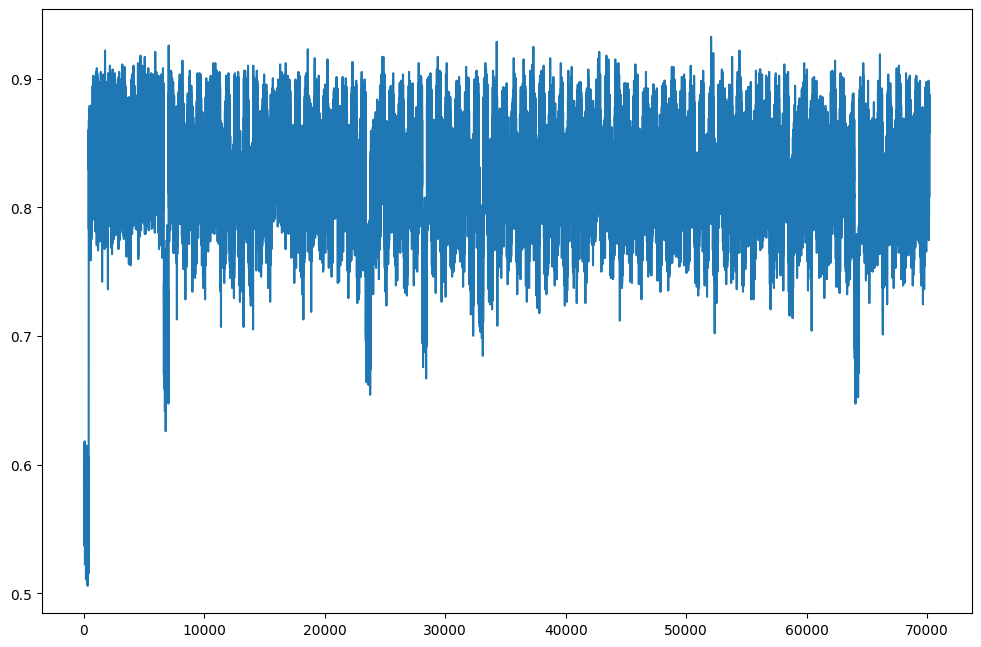

In [8]:
plt.plot(np.array(ctl['aff_trace']['acc']) / np.array(ctl['aff_trace']['cnt']))

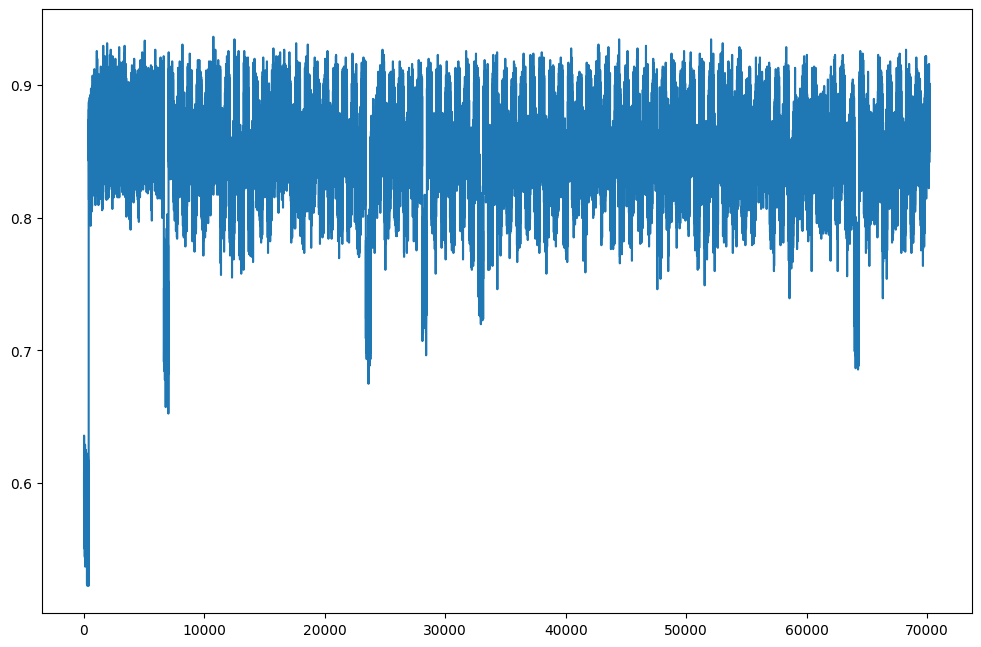

In [9]:
plt.plot(np.array(ctl['aff_trace']['reward']) / np.array(ctl['aff_trace']['cnt']))

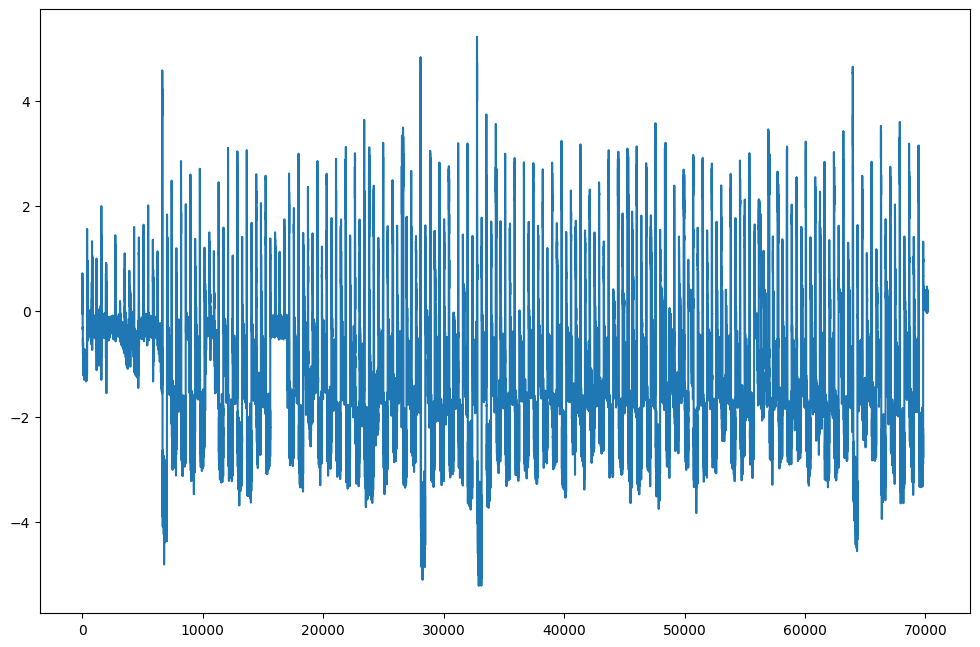

In [10]:
plt.plot(np.array(ctl['aff_trace']['pol_loss']) / np.array(ctl['aff_trace']['cnt']))

In [11]:
target['test_metrics']

[{'loss': 1.295285852432251, 'top1': 0.6373, 'top5': 0.897},
 {'loss': 0.9794329284667969, 'top1': 0.7211, 'top5': 0.9386},
 {'loss': 0.8957210374832153, 'top1': 0.7492, 'top5': 0.9451},
 {'loss': 0.911720211982727, 'top1': 0.7544, 'top5': 0.949},
 {'loss': 0.92768000831604, 'top1': 0.7592, 'top5': 0.9454},
 {'loss': 0.9567084762573242, 'top1': 0.7663, 'top5': 0.9453},
 {'loss': 0.9439107538223267, 'top1': 0.7732, 'top5': 0.9459},
 {'loss': 0.9665074773788452, 'top1': 0.7729, 'top5': 0.9504},
 {'loss': 0.9757876665115356, 'top1': 0.7781, 'top5': 0.9504},
 {'loss': 1.0054310254096985, 'top1': 0.7743, 'top5': 0.943},
 {'loss': 1.0095946840286254, 'top1': 0.7812, 'top5': 0.9466},
 {'loss': 0.968451132774353, 'top1': 0.7911, 'top5': 0.9499},
 {'loss': 0.935738028717041, 'top1': 0.7924, 'top5': 0.9513},
 {'loss': 0.8937439144134521, 'top1': 0.8091, 'top5': 0.9523},
 {'loss': 0.8435927581787109, 'top1': 0.8122, 'top5': 0.9538},
 {'loss': 0.8046676956176758, 'top1': 0.8159, 'top5': 0.9541},
 

In [12]:
len(target['policy']) # [epoch,train_len,M*batch,NP,3]

180

In [13]:
ops = augment_list(False)
cdfs = []
for policy in target['policy']:
    elem = []
    policy_pool = torch.from_numpy(np.concatenate(policy)).reshape(-1,3)
    for i, op in enumerate(ops):
#         cnt = torch.sum(policy_pool[:,0] == i).item()
        mag = torch.sum(policy_pool[policy_pool[:,0] == i][:,2].float()).item()
        if np.isnan(mag): mag = 0.
#         print(op[0].__name__,mag)
        elem.append(mag)
    cdf = np.array([ sum(elem[i:])for i, el in enumerate(elem)])
    cdf[0] = sum(elem)
#     cdf /= cdf[0]
    cdfs.append(cdf)
cdfs = np.array(cdfs)
print(cdfs.shape)

(180, 15)


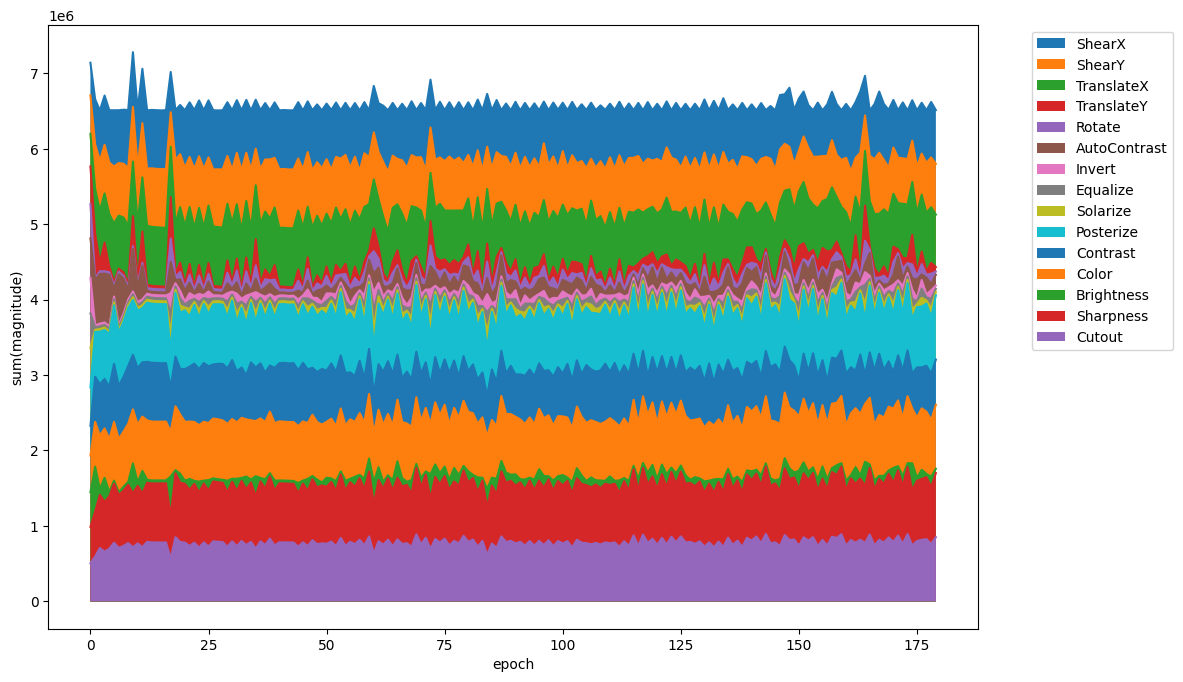

In [14]:
# cmap = cm.get_cmap('jet', len(ops))
for i, op in enumerate(ops):
#     plt.bar(list(range(len(cdfs))),cdfs[:,i], label=op[0].__name__)
    plt.plot(list(range(len(cdfs))),cdfs[:,i])
    plt.fill_between(list(range(len(cdfs))), cdfs[:,i], label=op[0].__name__)

    plt.xlabel("epoch")
plt.ylabel("sum(magnitude)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [15]:
policy_pool = torch.from_numpy(np.concatenate(target['policy'][-1])).reshape(-1,3)
print(policy_pool.shape)
print(Counter(policy_pool[:,0].numpy()))
print(Counter(policy_pool[:,2].numpy()))

torch.Size([1597440, 3])
Counter({9: 209157, 14: 208768, 13: 208444, 11: 208082, 0: 174815, 2: 170918, 1: 164995, 10: 146784, 5: 35145, 3: 14480, 12: 14117, 6: 10549, 7: 10406, 4: 10395, 8: 10385})
Counter({5: 478625, 3: 476534, 4: 476427, 8: 24092, 2: 23773, 0: 23716, 1: 23690, 9: 23668, 6: 23547, 7: 23368})


ShearX 174815 4.074930667877197
ShearY 164995 4.0767903327941895
TranslateX 170918 4.0731635093688965
TranslateY 14480 4.088397979736328
Rotate 10395 4.066955089569092
AutoContrast 35145 4.074491500854492
Invert 10549 4.076310634613037
Equalize 10406 4.067557334899902
Solarize 10385 4.097448348999023
Posterize 209157 4.0797343254089355
Contrast 146784 4.070143699645996
Color 208082 4.080948829650879
Brightness 14117 4.068357467651367
Sharpness 208444 4.07567024230957
Cutout 208768 4.069809436798096


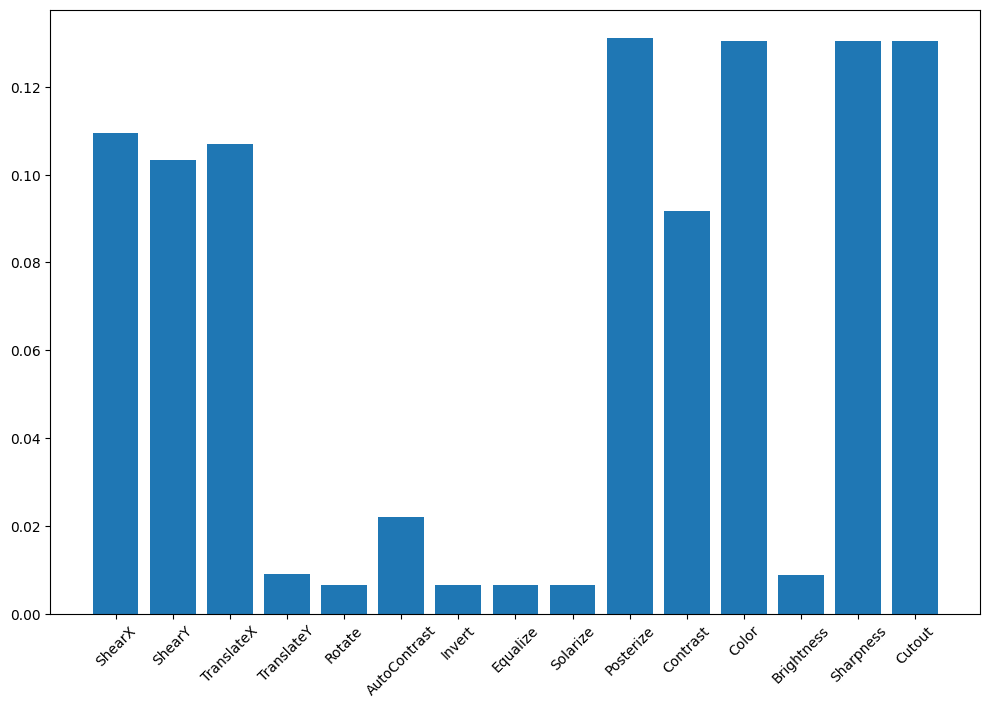

In [16]:
ops = augment_list(False)
elem = []
for i, op in enumerate(ops):
    cnt = torch.sum(policy_pool[:,0] == i).item()
    mag = torch.mean(policy_pool[policy_pool[:,0] == i][:,2].float()).item()
    if np.isnan(mag): mag = 0.
    print(op[0].__name__,cnt,mag)
#     plt.text(op[0].__name__,cnt*mag, f"{mag}")
    elem.append(cnt*mag)
elem = np.array(elem)
plt.bar([op[0].__name__ for op in ops],elem / np.sum(elem))
plt.xticks(rotation=45)
plt.show()

In [17]:
aug_data = np.array([95.66,95.42,95.66,95.71,95.73,95.55,95.7,95.50])
data = np.array([95.23,95.48,95.65,95.54,95.63,95.73,95.41,95.28])
print(f"aug {np.mean(aug_data):.2f}+-{np.std(aug_data):.2f}")
print(f"def {np.mean(data):.2f}+-{np.std(data):.2f}")

aug 95.62+-0.11
def 95.49+-0.17


In [18]:
fa = np.array([96.04,95.87,96,95.63,95.88,95.8,95.98,96.07])
total_aug = np.array([96.29,96.21,96,96.2,96.34,96.11,96.24,95.91])
print(f"fa {np.mean(fa):.2f}+-{np.std(fa):.2f}")
print(f"total_aug {np.mean(total_aug):.2f}+-{np.std(total_aug):.2f}")

fa 95.91+-0.14
total_aug 96.16+-0.14
